In [1]:
from src.data_processing import load_cmu
import itertools  
from pprint import pprint
from nltk.corpus import cmudict
import nltk
import xmltodict
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
# Removing stresses
cmu = cmudict.dict()
for key, val in cmu.items():
    for i, phoneme in enumerate(val):
        cmu[key][i] = list(map(lambda ph: ph[:2], phoneme))

In [3]:
task1 = []
task2 = []
with open("/home/doogy/Data/semeval2017_task7/data/test/subtask1-heterographic-test.xml") as f:
    xmldict = xmltodict.parse(f.read())
    for sent in xmldict['corpus']['text']:
        task1.append({"words": [w['#text'] for w in sent['word'] if '#text' in w]})
        
with open("/home/doogy/Data/semeval2017_task7/data/test/subtask1-heterographic-test.gold") as f:
    for i, line in enumerate(f.readlines()):
        task1[i]['pun'] = bool(int(line.split()[1]))
        
with open("/home/doogy/Data/semeval2017_task7/data/test/subtask2-heterographic-test.xml") as f:
    xmldict = xmltodict.parse(f.read())
    for sent in xmldict['corpus']['text']:
        task2.append({"words": [w['#text'] for w in sent['word'] if '#text' in w]})
        
with open("/home/doogy/Data/semeval2017_task7/data/test/subtask2-heterographic-test.gold") as f:
    for i, line in enumerate(f.readlines()):
        word_array = xmldict['corpus']['text'][i]['word']
        
        task2[i]['target'] = word_array[[w['@id'] for w in word_array].index(line.split()[1])]['#text']
        
task3 = []
with open("/home/doogy/Data/semeval2017_task7/data/test/subtask3-heterographic-test.gold") as f:
    for line in f.readlines():
        lsplit = line.split()
        left = list(set([w[:w.index('%')] for w in lsplit[1].split(';')]))
        right = list(set([w[:w.index('%')] for w in lsplit[2].split(';')]))
        task3.append((left, right))
        

In [5]:
min_pairs = []
from src.string_similarity import levenshtein

for targets, recoveries in task3:
    if len(targets) == 1 and len(recoveries) == 1:
        min_pairs.append((targets[0], recoveries[0]))
    else:
        min_distance = 1e10
        check = False
        for word1, word2 in itertools.product(targets, recoveries):
            if word1 in cmu and word2 in cmu:
                check = True
                distance = levenshtein(cmu[word1], cmu[word2])
                if distance < min_distance:
                    min_distance = distance
                    min_pair = (word1, word2)
                break
        if check:
            min_pairs.append(min_pair)
        else:
            min_pairs.append((targets[0], recoveries[0]))

In [6]:
min_pairs

[('allege', 'ledge'),
 ('coolly', 'cooly'),
 ('orifice', 'office'),
 ('gnu', 'news'),
 ('harried', 'hairy'),
 ('stair', 'stare'),
 ('archly', 'arch'),
 ('hertz', 'hurt'),
 ('dye', 'die'),
 ('know', 'nose'),
 ('maid', 'make'),
 ('knowingly', 'no'),
 ('octave', 'active'),
 ('punctually', 'puncture'),
 ('psalm', 'arm'),
 ('thick', 'sick'),
 ('sole', 'sell'),
 ('hostel', 'hostile'),
 ('accord', 'chord'),
 ('knotty', 'naughty'),
 ('humorlessly', 'humerus'),
 ('cannily', 'cannes'),
 ('lute', 'loot'),
 ('congealed', 'concealed'),
 ('hart', 'heart'),
 ('mutter', 'mother'),
 ('bovine', 'divine'),
 ('era', 'ear'),
 ('reptile', 'tile'),
 ('quart', 'court'),
 ('lint', 'lend'),
 ('mood', 'moo'),
 ('offal', 'awful'),
 ('crummy', 'crumb'),
 ('sail', 'sale'),
 ('mine', 'mind'),
 ('toad', 'tow'),
 ('candied', 'candid'),
 ('mansion', 'mention'),
 ('bark', 'bach'),
 ('throng', 'wrong'),
 ('pane', 'pain'),
 ('hole', 'whole'),
 ('stiltedly', 'stilt'),
 ('sari', 'sorry'),
 ('cash', 'cache'),
 ('pasta', 'pas

In [5]:
from statistics import *
levenshtein_distances = [levenshtein(w1, w2) for w1, w2 in min_pairs]
print("Mean: ", mean(levenshtein_distances))
print("Mode: ", mode(levenshtein_distances))
print("STD: ", stdev(levenshtein_distances))
print("Min: ", min(levenshtein_distances))
print("Max: ", max(levenshtein_distances))

Mean:  2.4280510018214936
Mode:  2
STD:  1.40866443375039
Min:  0
Max:  10


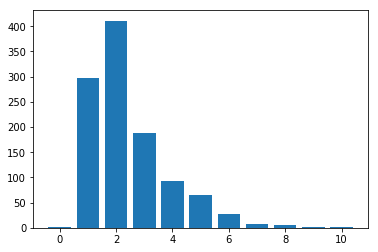

In [7]:
c = Counter(levenshtein_distances)
plt.bar(c.keys(), c.values())
plt.show()

In [8]:
pairs_in_cmu = [(w1, w2) for w1, w2 in min_pairs if w1 in cmu and w2 in cmu]
shared_first_phoneme = [(w1, w2) for w1, w2 in min_pairs if w1 in cmu and w2 in cmu and cmu[w1][0] == cmu[w2][0]]
first_letter_first_phoneme = [(w1, w2) for w1, w2 in min_pairs if w1 in cmu and w2 in cmu 
                              and cmu[w1][0][0] == cmu[w2][0][0]]
print("Number sharing same first phoneme: ", len(shared_first_phoneme) / len(pairs_in_cmu))
print("Number with same first letter: ", len([_ for w1, w2 in min_pairs if w1[0] == w2[0]]) / len(min_pairs))
print("First letter first phoneme: ", len(first_letter_first_phoneme) / len(pairs_in_cmu))

Number sharing same first phoneme:  0.31875
Number with same first letter:  0.802367941712204
First letter first phoneme:  0.85
